# EDA for Squat 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import json

## Read in Dataset

In [14]:
#TODO: Combine with Sam Labels and Check Relationshiip between my given scores and Sam Scores

csv_file_path = 'data/dataset.csv'

df = pd.read_csv(csv_file_path)

df.drop(12, inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.head)

<bound method NDFrame.head of    Side Filename Front Filename  Frames  \
0   IMG_7028.mov   IMG_7029.mov       2   
1   IMG_7030.mov   IMG_7031.mov       2   
2   IMG_7032.mov   IMG_7033.mov       2   
3   IMG_7036.mov   IMG_7037.mov       2   
4   IMG_7040.mov   IMG_7041.mov       2   
5   IMG_7042.mov   IMG_7043.mov       2   
6   IMG_7045.mov   IMG_7046.mov       2   
7   IMG_7047.mov   IMG_7048.mov       2   
8   IMG_7055.mov   IMG_7056.mov       2   
9   IMG_7057.mov   IMG_7058.mov       2   
10  IMG_6783.mov   IMG_6784.mov       2   
11  IMG_7026.mov   IMG_7027.mov       2   
12  IMG_7038.mov   IMG_7039.mov       2   
13  IMG_7051.mov   IMG_7052.mov       2   
14  IMG_7053.mov   IMG_7054.mov       2   
15  IMG_7059.mov   IMG_7060.mov       2   

                                            Hip Angle  \
0   [{'L': [158.72561641948374, 156.8432140517468,...   
1   [{'L': [157.23464889336142, 154.211237702708, ...   
2   [{'L': [156.78162162565775, 154.19813770529908...   
3   [{'L':

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Side Filename             17 non-null     object
 1   Front Filename            17 non-null     object
 2   Frames                    17 non-null     int64 
 3   Hip Angle                 17 non-null     object
 4   Knee Angle                17 non-null     object
 5   Ankle Angle               17 non-null     object
 6   Deviation Angle           17 non-null     object
 7   Shoulder Deviation Angle  17 non-null     object
 8   Torso Min                 17 non-null     object
 9   Shoulder Min              17 non-null     object
 10  Foot Angle                17 non-null     object
 11  VarValg Angle             17 non-null     object
 12  VV Min                    17 non-null     object
 13  Foot Inout Angle          17 non-null     object
 14  Deep Femur                17

## Plot Hip, Knee, and Ankle Angles

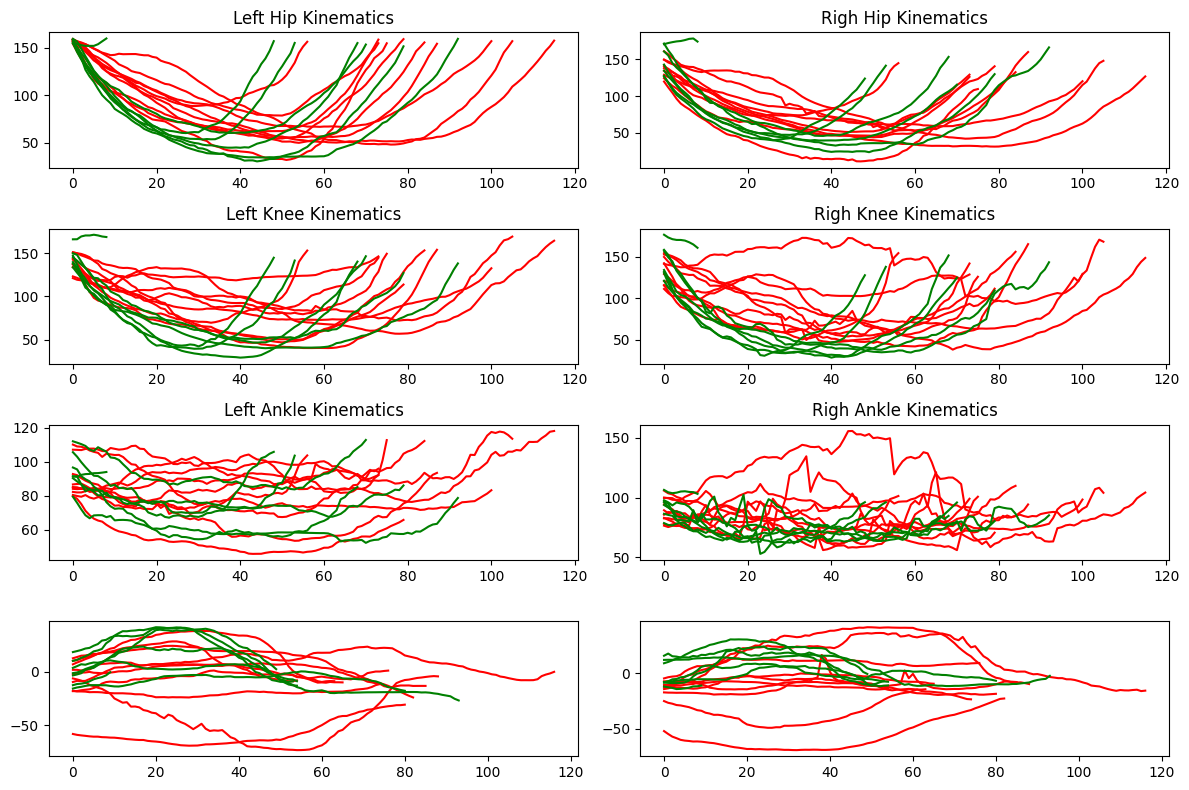

In [9]:
hip_angles = df['Hip Angle']
knee_angles = df['Knee Angle']
ankle_angles = df['Ankle Angle']
varval_angles = df['VarValg Angle']

labels = df['Qualitative Quality']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = [12,8])

angle_names = [hip_angles, knee_angles, ankle_angles, varval_angles]

for i, name in enumerate(angle_names):
    for j, angle in enumerate(name):
        angle = ast.literal_eval(angle)
        if 'good' in labels[j]:
            axes[i, 0].plot(angle[0]["L"], 'g', label='good')
            axes[i, 1].plot(angle[0]["R"], 'g', label='good')
        else:
            axes[i, 0].plot(angle[0]["L"], 'r', label='bad')
            axes[i, 1].plot(angle[0]["R"], 'r', label='bad')        

axes[0, 0].set_title("Left Hip Kinematics")
axes[0, 1].set_title("Righ Hip Kinematics")
axes[1, 0].set_title("Left Knee Kinematics")
axes[1, 1].set_title("Righ Knee Kinematics")
axes[2, 0].set_title("Left Ankle Kinematics")
axes[2, 1].set_title("Righ Ankle Kinematics")
# plt.legend()
plt.tight_layout()
plt.show()


## Plot Deviation, Shoulder Deviation, and Varus Valgus Angles

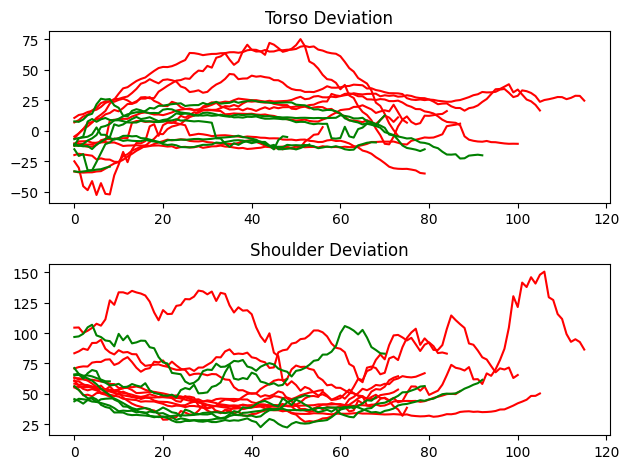

In [10]:
dev_angles = df['Deviation Angle']
devs_angles = df['Shoulder Deviation Angle']
labels = df['Qualitative Quality']

fig, axes = plt.subplots(nrows=2, ncols=1)

angle_names = [dev_angles, devs_angles]

for i, name in enumerate(angle_names):
    for j, angle in enumerate(name):
        angle = ast.literal_eval(angle)
        if 'good' in labels[j]:
            axes[i].plot(angle[0], 'g', label='good')
        else:
            axes[i].plot(angle[0], 'r', label='bad')        

axes[0].set_title("Torso Deviation")
axes[1].set_title("Shoulder Deviation")
# plt.legend()
plt.tight_layout()
plt.show()


## Plot Deviations and Varus/Valgus at Squat Base 

/var/folders/5w/rdk3x1x921338kfzmkbp31_w0000gn/T/ipykernel_14920/3705616191.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


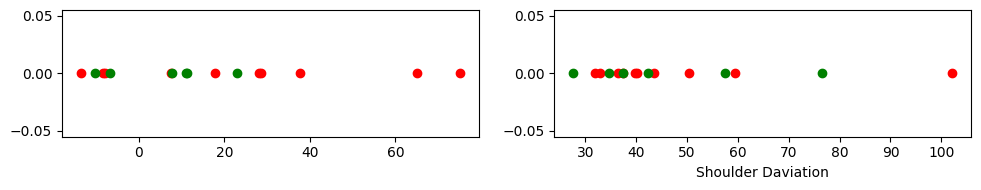

In [27]:
torso_mins = df['Torso Min']
shoulder_mins = df['Shoulder Min']
labels = df['Qualitative Quality']


fig, axes = plt.subplots(nrows=2, ncols=1, figsize = [10,2])

angle_names = [torso_mins, shoulder_mins]

for i, name in enumerate(angle_names):
    for j, angle in enumerate(name):
        angle = ast.literal_eval(angle)
        if 'good' in labels[j]:
            plt.subplot(1, 2, i+1)
            plt.plot(angle[0], 0, 'go', label='good')
        else:
            plt.subplot(1, 2, i+1)
            plt.plot(angle[0], 0, 'ro', label='bad')  

# plt.legend()
plt.xlabel('Shoulder Daviation')
plt.tight_layout()
plt.show()


(-6.800780335901816, -0.46041551076218945)
(4.291383776061077, -8.201717552953772)
(-27.92062416171203, -9.590695250329672)
(-38.30354548364118, -46.920749432324264)
(64.69858224019674, -9.124861988089497)
(23.790142139387406, -5.627289474765223)
(-20.27295641239453, -68.92613456179672)
(5.5359858905924755, 8.1168830636082)
(-6.88286430178679, -11.434773017445611)
(-19.277968890238306, 33.688962942770075)
(-2.9369199570864875, 12.895032198204154)
(-19.539587800246878, 7.60496215943662)
(4.850091229878216, -3.281859607008664)
(-41.70926925065078, 29.83337273435607)
(-39.34019465264801, 21.058983960363715)
(-37.11194999497639, 18.868386341394835)


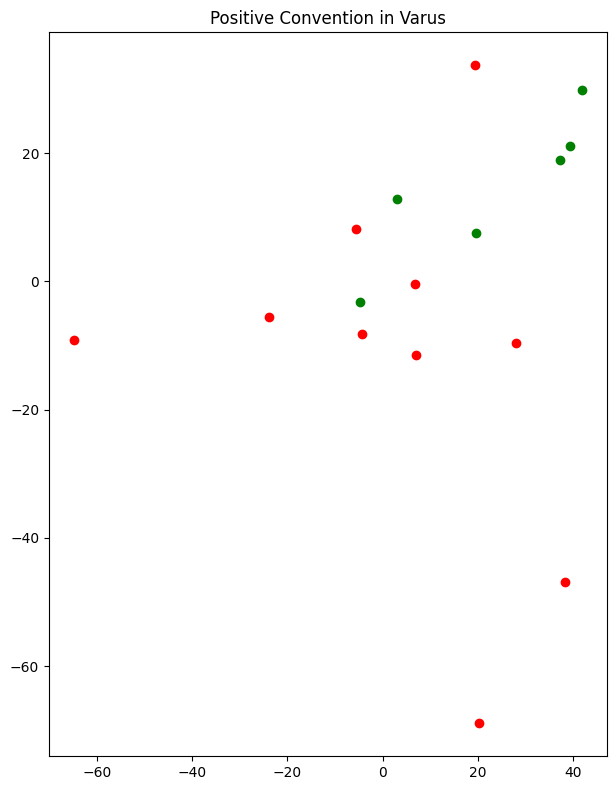

In [38]:
vv_mins = df['VV Min']
labels = df['Qualitative Quality']

plt.figure(figsize=[12, 8])

for j, angle in enumerate(vv_mins):
    angle = ast.literal_eval(angle)[0]
    print(angle)
    if 'good' in labels[j]:
        plt.subplot(1, 2, i+1)
        plt.plot(-angle[0], angle[1], 'go', label='good')
    else:
        plt.subplot(1, 2, i+1)
        plt.plot(-angle[0], angle[1], 'ro', label='bad')  

# plt.legend()
plt.title("Positive Convention in Varus")
plt.tight_layout()
plt.show()


## Deep Femur Plot

The following (R, L) pairs indicate the vertical position of the hip joint
(14.264294215840444, 7.964336024690533)
(7.475089015908083, 2.365581929901799)
(26.52483514250271, 16.812053284253214)
(29.875474006279894, 13.471188599742465)
(22.3907544109565, 19.285617385353092)
(48.36264687334635, 29.166354674414997)
(26.08181396346423, 27.19955486429466)
(6.599842053076219, -14.243330012472136)
(10.903693350493938, 10.305799587677415)
(14.068455026794211, 9.256319195310384)
(-4.535356226888688, -7.770751987359486)
(4.502018706505322, 0.9146875444465427)
(99.9806584554402, 87.71054742827985)
(5.318375257868121, -2.2776475303065427)
(-0.619011105959445, -3.268785152726706)
(4.598740398227963, -2.5196323871351787)
(-1.0213732126222075, -7.241398598349619)


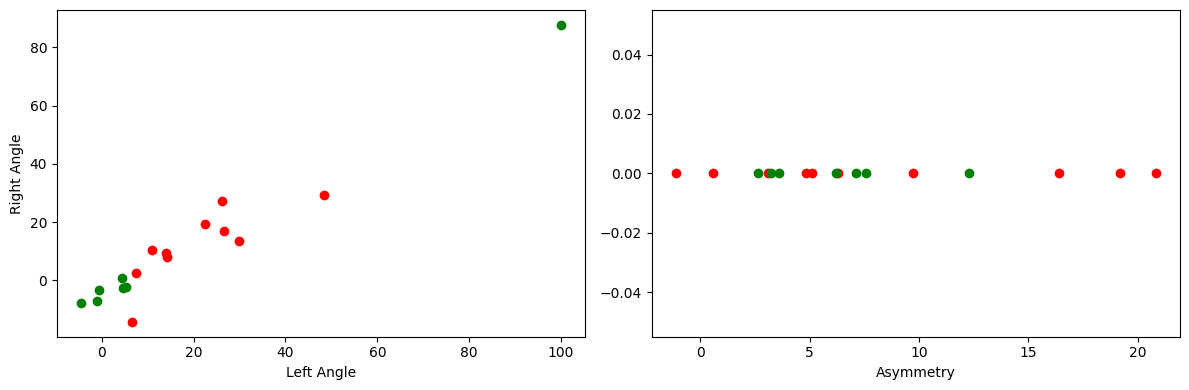

In [12]:
deep_femur = df['Deep Femur']
labels = df['Qualitative Quality']

print("The following (R, L) pairs indicate the vertical position of the hip joint")
plt.figure(figsize=[12,4])
for j, angle in enumerate(deep_femur):
    angle = ast.literal_eval(angle)
    print(angle)
    if 'good' in labels[j]:
        plt.subplot(1, 2, 1)
        plt.plot(angle[0], angle[1], 'go', label='good')
        plt.subplot(1, 2, 2)
        plt.plot(angle[0] - angle[1], 0, 'go', label='good')
    else:
        plt.subplot(1, 2, 1)
        plt.plot(angle[0], angle[1], 'ro', label='bad')  
        plt.xlabel('Left Angle')
        plt.ylabel('Right Angle')
        plt.subplot(1, 2, 2)
        plt.plot(angle[0] - angle[1], 0, 'ro', label='bad')
    

# plt.legend()
plt.xlabel('Asymmetry')
plt.tight_layout()
plt.show()

## Plot Hip Convolution

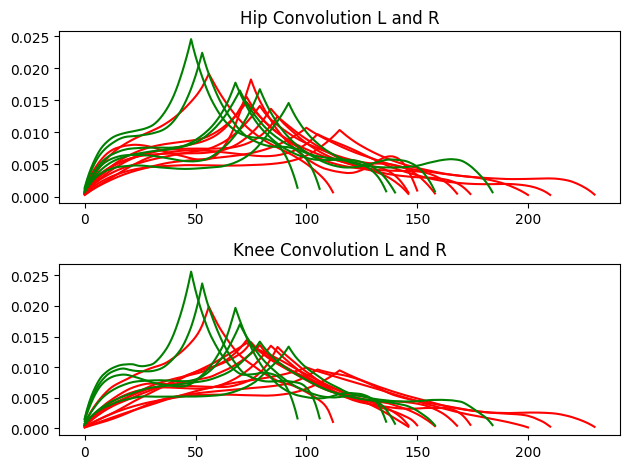

In [15]:
hip_data = df['Hip Data']
knee_data = df['Knee Data']
labels = df['Qualitative Quality']

fig, axes = plt.subplots(nrows=2, ncols=1)

data_names = [hip_data, knee_data]

for i, name in enumerate(data_names):
    for j, angle in enumerate(name):
        angle = ast.literal_eval(angle)
        if 'good' in labels[j]:
            axes[i].plot(angle["conv"], 'g', label='good')
        else:
            axes[i].plot(angle["conv"], 'r', label='bad')

# plt.legend()
axes[0].set_title("Hip Convolution L and R")
axes[1].set_title("Knee Convolution L and R")
plt.tight_layout()
plt.show()
